## FAQ


**How did you find the data?**
- US: I started on [data.gov](data.gov), which pointed me to [census.gov](https://factfinder.census.gov/faces/nav/jsf/pages/download_center.xhtml). There I fetched dataset `SE1500CSA01`.
- FR: [ESANE](https://www.insee.fr/fr/statistiques/3136821?sommaire=3136881). See also [this](https://www.economie.gouv.fr/cedef/chiffres-cles-des-pme).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 

def load_us_data():
    filepath = 'data/ASE_2015_00CSA01_with_ann.csv'
    sector_col_name = 'NAICS.display-label'
    slug_filepath = 'data/sector_slugs.csv'
    
    # read
    country_df = pd.read_csv(filepath)
    cat_df = pd.read_csv(slug_filepath, encoding='ANSI')
    df = pd.merge(country_df, cat_df, how='inner', 
                  left_on=sector_col_name, right_on='label'
                 )
    
    # filter rows to keep only totals
    crit = ( 
        (df['SEX.id']==1) 
        & (df['ETH_GROUP.id']==1) 
        & (df['RACE_GROUP.id']==0)
        & (df['VET_GROUP.id']==1)
    )
    df = df[crit]
    
    # add columns
    df['country'] = 'US'
    df['firms'] = df['FIRMPDEMP']
    df['firms_se'] = df['FIRMPDEMP'] * df['FIRMPDEMP_S'] # std error
    df['employees'] = df['EMP']
    df['sales'] = df['RCPPDEMP']
    df['payroll'] = df['PAYANN']
    df['sector_short'] = df[sector_col_name].map(
        lambda x: re.split('\W', x)[0] # select first token
    )
    
    
    # filter columns
    cols = ['sector', 'country', 'firms', 'firms_se', 'employees']
    df = df[cols]
    return df


# Activité,Nombre d'entreprises

us_df = load_us_data()
us_df#.head()
# us_df.groupby(by="sector").sum().reset_index()


,sector,country,firms,firms_se,employees
0,total,US,5531169,0.0,118402027
126,agriculture,US,27151,124894.6,255210
252,industry,US,22941,71117.1,709916
378,industry,US,5881,28228.8,624749
504,construction,US,652561,326280.5,5775921
630,industry,US,250748,250748.0,11584513
756,trade,US,308862,370634.4,5925232
882,trade,US,649870,519896.0,15403115
1008,trade,US,177140,336566.0,4589565
1134,information,US,71835,100569.0,3224892


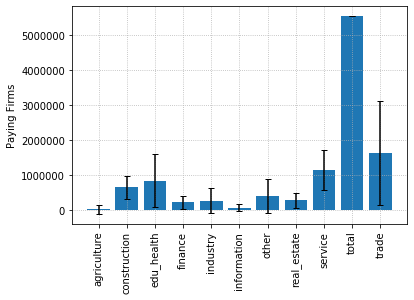

In [2]:
# plot 
def plot(df):
    x = range(len(df))
    y = df['firms']
    yer = df['firms_se']
    plt.grid(True, linestyle='dotted')
    plt.bar(x, y, yerr=yer, capsize=3)
    plt.xticks(rotation=90)
    plt.xticks(range(len(df)), df['sector'])
    plt.ylabel('Paying Firms')
    # https://stackoverflow.com/a/44645072
    # https://python-graph-gallery.com/8-add-confidence-interval-on-barplot/

plot(us_df.groupby(by="sector").sum().reset_index())
# TODO: should not sum std errors